## Train Model

In [1]:
import os
import logging
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

from SimpleWalk2D import SimpleWalk2DDynGoal

env = SimpleWalk2DDynGoal()

### Train Callback

In [2]:
class TrainAndLoggingCallback(BaseCallback):
    
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok = True)
            
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
            
        return True

In [3]:
env_name = 'SW2DDynGoal'

CHECKPOINT_DIR = './train/train_' + env_name
LOG_DIR = './train/log_' + env_name

callback = TrainAndLoggingCallback(check_freq=10_000, save_path=CHECKPOINT_DIR)

log_path = os.path.join('Training', 'Logs')

model = PPO(
    "MlpPolicy", 
    env, 
    verbose=1, 
    tensorboard_log=log_path,
    learning_rate=0.001,
    n_steps =1024
    )
logger.setLevel(logging.INFO)

model.learn(
    total_timesteps=150_000, 
    callback = callback
    )

model.save('PPO')

logger.setLevel(logging.DEBUG)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Training/Logs/PPO_35
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 17.6      |
|    ep_rew_mean     | -2.78e+03 |
| time/              |           |
|    fps             | 671       |
|    iterations      | 1         |
|    time_elapsed    | 1         |
|    total_timesteps | 1024      |
----------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 17.5         |
|    ep_rew_mean          | -2.69e+03    |
| time/                   |              |
|    fps                  | 706          |
|    iterations           | 2            |
|    time_elapsed         | 2            |
|    total_timesteps      | 2048         |
| train/                  |              |
|    approx_kl            | 0.0053686565 |
|    clip_fraction        | 0.026        |
|    cl

## Test Model

In [4]:
from stable_baselines3 import PPO
from SimpleWalk2D import SimpleWalk2DDynGoal

env = SimpleWalk2DDynGoal()

model = PPO.load("PPO", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 0.7474822998046875
DEBUG:root:movement: 1.7641725540161133
DEBUG:root:vector 1: [ 0.12012863 -1.        ]
DEBUG:root:vector 2: [ 0.85121775 -1.        ]
DEBUG:root:angle: 0.5856448188410511
DEBUG:root:movement: 1.87440824508667
DEBUG:root:vector 1: [ 0.85121775 -1.        ]
DEBUG:root:vector 2: [ 1. -1.]
DEBUG:root:angle: 0.08019631870729862
DEBUG:root:movement: 1.6401448249816895
DEBUG:root:vector 1: [ 1. -1.]
DEBUG:root:vector 2: [ 0.73765993 -1.        ]
DEBUG:root:angle: 0.149841949149482
DEBUG:root:movement: 1.0601167678833008
DEBUG:root:vector 1: [ 0.73765993 -1.        ]
DEBUG:root:vector 2: [ 0.18822956 -1.        ]
DEBUG:root:angle: 0.4495038956972908
DEBUG:root:movement: 1.5905442237854004
DEBUG:root:vector 1: [ 0.18822956 -1.        ]
DEBUG:root:vector 2: [ 1. -1.]
DEBUG:root:angle: 0.5993455084914596
DEBUG:root:movement: 0.8074326515197754
DEBUG:root:vector 1: [ 1. -1.]
DEBUG:root:vector 2: [ 1. -1.]
DEBUG:root:angle: 0.0003

done
info {'distance_to_goal': 11.488299, 'steps_taken': 20, 'previous_state': array([18.70917 ,  8.784077,  7.196636, 12.44648 ,  7.555416, 12.133375],
      dtype=float32), 'new_state': array([18.70917 ,  8.784077,  7.196636, 12.44648 ,  7.555416, 12.133375],
      dtype=float32)}


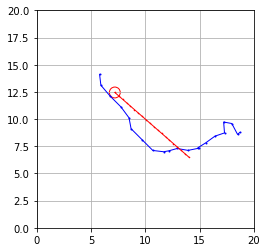

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 0.5589585304260254
DEBUG:root:movement: 0.9095568656921387
DEBUG:root:vector 1: [ 0.80646706 -1.        ]
DEBUG:root:vector 2: [ 0.53135204 -1.        ]
DEBUG:root:angle: 0.19025835846325556
DEBUG:root:movement: 0.19577693939208984
DEBUG:root:vector 1: [ 0.53135204 -1.        ]
DEBUG:root:vector 2: [ 0.9988117 -1.       ]
DEBUG:root:angle: 0.2963901135391358
DEBUG:root:movement: -0.3457169532775879
DEBUG:root:vector 1: [ 0.9988117 -1.       ]
DEBUG:root:vector 2: [ 1. -1.]
DEBUG:root:angle: 0.0005980199656453665
DEBUG:root:movement: -0.19774818420410156
DEBUG:root:vector 1: [ 1. -1.]
DEBUG:root:vector 2: [ 0.37617207 -0.38803577]
DEBUG:root:angle: 0.015521817267553292
DEBUG:root:movement: -0.6365456581115723
DEBUG:root:vector 1: [ 0.37617207 -0.38803577]
DEBUG:root:vector 2: [0.69108295 0.2950983 ]
DEBUG:root:angle: 1.2044916628630002
DEBUG:root:movement: 0.4327116012573242
DEBUG:root:vector 1: [0.69108295 0.2950983 ]
DEBUG:root:vector 

done
info {'distance_to_goal': 9.359434, 'steps_taken': 17, 'previous_state': array([20.280928,  8.978956, 10.056481, 10.63503 , 10.014291, 10.160712],
      dtype=float32), 'new_state': array([20.280928,  8.978956, 10.056481, 10.63503 , 10.014291, 10.160712],
      dtype=float32)}


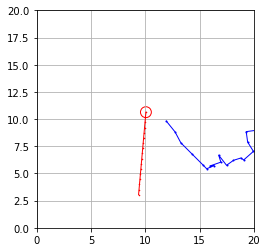

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: -0.4733619689941406
DEBUG:root:movement: 0.5772418975830078
DEBUG:root:vector 1: [0.8600254  0.99999976]
DEBUG:root:vector 2: [-0.1833229  0.3621273]
DEBUG:root:angle: 1.1789119142716709
DEBUG:root:movement: 0.055014610290527344
DEBUG:root:vector 1: [-0.1833229  0.3621273]
DEBUG:root:vector 2: [ 0.18821907 -0.17572927]
DEBUG:root:angle: 2.7905167060893095
DEBUG:root:movement: -0.09799003601074219
DEBUG:root:vector 1: [ 0.18821907 -0.17572927]
DEBUG:root:vector 2: [0.718462 1.      ]
DEBUG:root:angle: 1.698881069748065
DEBUG:root:movement: -0.18216705322265625
DEBUG:root:vector 1: [0.718462 1.      ]
DEBUG:root:vector 2: [ 0.48906898 -0.05707026]
DEBUG:root:angle: 1.0639532505049158
DEBUG:root:movement: -0.1043405532836914
DEBUG:root:vector 1: [ 0.48906898 -0.05707026]
DEBUG:root:vector 2: [0.6294308 0.7599478]
DEBUG:root:angle: 0.9952287053437874
DEBUG:root:movement: -0.06759834289550781
DEBUG:root:vector 1: [0.6294308 0.7599478]
DEBUG:

done
info {'distance_to_goal': 8.766798, 'steps_taken': 15, 'previous_state': array([20.07851  ,  7.678393 , 11.789717 , 11.2390585, 11.398199 ,
       10.968002 ], dtype=float32), 'new_state': array([20.07851  ,  7.678393 , 11.789717 , 11.2390585, 11.398199 ,
       10.968002 ], dtype=float32)}


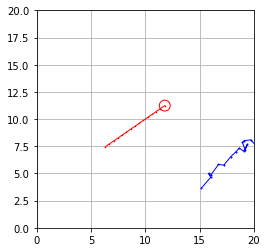

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 0.3978862762451172
DEBUG:root:movement: -0.27715301513671875
DEBUG:root:vector 1: [-0.45433235  0.80927944]
DEBUG:root:vector 2: [ 0.10234833 -0.80551434]
DEBUG:root:angle: 2.756419143402486
DEBUG:root:movement: -0.7958307266235352
DEBUG:root:vector 1: [ 0.10234833 -0.80551434]
DEBUG:root:vector 2: [0.5642834 0.2964344]
DEBUG:root:angle: 1.9281187726673257
DEBUG:root:movement: -0.9762496948242188
DEBUG:root:vector 1: [0.5642834 0.2964344]
DEBUG:root:vector 2: [ 0.70176315 -0.22454357]
DEBUG:root:angle: 0.7933811305940078
DEBUG:root:movement: -0.01896381378173828
DEBUG:root:vector 1: [ 0.70176315 -0.22454357]
DEBUG:root:vector 2: [-0.1995945   0.50048447]
DEBUG:root:angle: 2.259946366587076
DEBUG:root:out of bounds
DEBUG:root:x: [19.070902, 18.61657, 18.718918, 19.283201, 19.984964, 19.78537, 20.44025]
DEBUG:root:y: [8.327963, 9.137242, 8.331728, 8.628162, 8.403619, 8.904103, 8.982768]
DEBUG:root:goal: [ 9.842098 10.290874]


done
info {'distance_to_goal': 9.764212, 'steps_taken': 6, 'previous_state': array([20.44025 ,  8.982768,  9.842098, 10.290874, 10.069286,  9.872373],
      dtype=float32), 'new_state': array([20.44025 ,  8.982768,  9.842098, 10.290874, 10.069286,  9.872373],
      dtype=float32)}


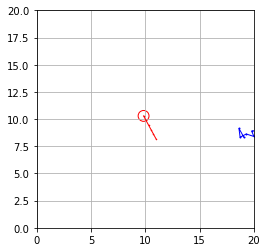

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 0.5025644302368164
DEBUG:root:movement: -0.06206989288330078
DEBUG:root:vector 1: [1. 1.]
DEBUG:root:vector 2: [0.87506676 0.05660534]
DEBUG:root:angle: 0.7208013511835845
DEBUG:root:movement: 0.4227027893066406
DEBUG:root:vector 1: [0.87506676 0.05660534]
DEBUG:root:vector 2: [0.97109604 0.7930417 ]
DEBUG:root:angle: 0.6202119743654048
DEBUG:root:movement: -0.1359238624572754
DEBUG:root:vector 1: [0.97109604 0.7930417 ]
DEBUG:root:vector 2: [1.         0.20643997]
DEBUG:root:angle: 0.4812286983685575
DEBUG:root:movement: 0.3907184600830078
DEBUG:root:vector 1: [1.         0.20643997]
DEBUG:root:vector 2: [0.86012363 1.        ]
DEBUG:root:angle: 0.6568740745199662
DEBUG:root:movement: 0.5973052978515625
DEBUG:root:vector 1: [0.86012363 1.        ]
DEBUG:root:vector 2: [0.24732113 0.68045855]
DEBUG:root:angle: 0.36172445198789094
DEBUG:root:movement: 0.23695898056030273
DEBUG:root:vector 1: [0.24732113 0.68045855]
DEBUG:root:vector 2: [

done
info {'distance_to_goal': 5.7557726, 'steps_taken': 20, 'previous_state': array([20.165222 ,  6.6767373, 14.098187 ,  8.900726 , 13.638255 ,
        9.024096 ], dtype=float32), 'new_state': array([20.165222 ,  6.6767373, 14.098187 ,  8.900726 , 13.638255 ,
        9.024096 ], dtype=float32)}


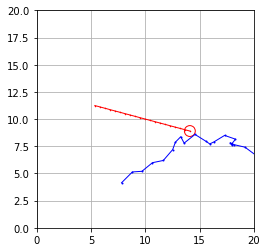

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: -0.31337976455688477
DEBUG:root:movement: -0.30502891540527344
DEBUG:root:vector 1: [ 1.0000001 -1.       ]
DEBUG:root:vector 2: [ 1. -1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: -0.35297346115112305
DEBUG:root:vector 1: [ 1. -1.]
DEBUG:root:vector 2: [ 0.2579739 -0.7369957]
DEBUG:root:angle: 0.44869265281681914
DEBUG:root:movement: 0.5105423927307129
DEBUG:root:vector 1: [ 0.2579739 -0.7369957]
DEBUG:root:vector 2: [ 1.0000002  -0.04682255]
DEBUG:root:angle: 1.1873024026856844
DEBUG:root:movement: -0.48880434036254883
DEBUG:root:vector 1: [ 1.0000002  -0.04682255]
DEBUG:root:vector 2: [ 1. -1.]
DEBUG:root:angle: 0.7386097487397172
DEBUG:root:movement: 1.1125450134277344
DEBUG:root:vector 1: [ 1. -1.]
DEBUG:root:vector 2: [1.       0.684186]
DEBUG:root:angle: 1.3854316731044558
DEBUG:root:movement: 0.11906814575195312
DEBUG:root:vector 1: [1.       0.684186]
DEBUG:root:vector 2: [ 1.        -0.2386117]
DEBUG:root:an

done
info {'distance_to_goal': 3.716601, 'steps_taken': 20, 'previous_state': array([14.6781645,  7.247734 , 10.792202 ,  8.979645 , 10.500172 ,
        9.355778 ], dtype=float32), 'new_state': array([14.6781645,  7.247734 , 10.792202 ,  8.979645 , 10.500172 ,
        9.355778 ], dtype=float32)}


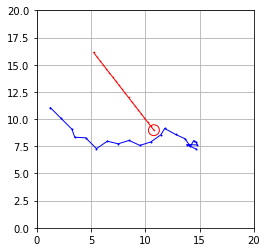

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 0.3848447799682617
DEBUG:root:movement: 0.5949139595031738
DEBUG:root:vector 1: [ 0.58692646 -1.        ]
DEBUG:root:vector 2: [ 0.5454998 -1.       ]
DEBUG:root:angle: 0.03136931887862443
DEBUG:root:movement: 0.06211423873901367
DEBUG:root:vector 1: [ 0.5454998 -1.       ]
DEBUG:root:vector 2: [ 0.6799803 -1.       ]
DEBUG:root:angle: 0.09778122130376286
DEBUG:root:movement: -0.04491758346557617
DEBUG:root:vector 1: [ 0.6799803 -1.       ]
DEBUG:root:vector 2: [ 0.35970688 -0.5847492 ]
DEBUG:root:angle: 0.04567849976637246
DEBUG:root:movement: 0.3379812240600586
DEBUG:root:vector 1: [ 0.35970688 -0.5847492 ]
DEBUG:root:vector 2: [-0.15213585 -0.10870409]
DEBUG:root:angle: 1.5018745975944656
DEBUG:root:movement: -0.6716036796569824
DEBUG:root:vector 1: [-0.15213585 -0.10870409]
DEBUG:root:vector 2: [0.9120817 0.4506812]
DEBUG:root:angle: 2.9801236568986176
DEBUG:root:movement: 0.005513191223144531
DEBUG:root:vector 1: [0.9120817 0.45068

done
info {'distance_to_goal': 8.783738, 'steps_taken': 20, 'previous_state': array([19.545612,  9.478235, 11.714536, 13.103574, 11.484271, 12.686758],
      dtype=float32), 'new_state': array([19.545612,  9.478235, 11.714536, 13.103574, 11.484271, 12.686758],
      dtype=float32)}


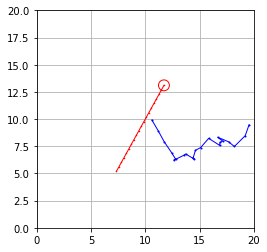

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 1.1695184707641602
DEBUG:root:movement: 1.5823898315429688
DEBUG:root:vector 1: [ 0.63491297 -1.        ]
DEBUG:root:vector 2: [ 1. -1.]
DEBUG:root:angle: 0.2197021743108953
DEBUG:root:movement: 1.5073606967926025
DEBUG:root:vector 1: [ 1. -1.]
DEBUG:root:vector 2: [ 1. -1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 0.7816412448883057
DEBUG:root:vector 1: [ 1. -1.]
DEBUG:root:vector 2: [ 0.60429 -1.     ]
DEBUG:root:angle: 0.24183042589283746
DEBUG:root:movement: 0.0136488676071167
DEBUG:root:vector 1: [ 0.60429 -1.     ]
DEBUG:root:vector 2: [ 1. -1.]
DEBUG:root:angle: 0.24183042589283746
DEBUG:root:movement: -0.4276989698410034
DEBUG:root:vector 1: [ 1. -1.]
DEBUG:root:vector 2: [ 0.5435896  -0.21070385]
DEBUG:root:angle: 0.4156134000289641
DEBUG:root:movement: -0.9464843273162842
DEBUG:root:vector 1: [ 0.5435896  -0.21070385]
DEBUG:root:vector 2: [ 1.        -0.6226921]
DEBUG:root:angle: 0.18715273689770023
DEBUG:r

done
info {'distance_to_goal': 7.364212, 'steps_taken': 20, 'previous_state': array([18.750027, 10.29396 , 11.93504 , 14.248317, 11.737655, 13.814962],
      dtype=float32), 'new_state': array([18.750027, 10.29396 , 11.93504 , 14.248317, 11.737655, 13.814962],
      dtype=float32)}


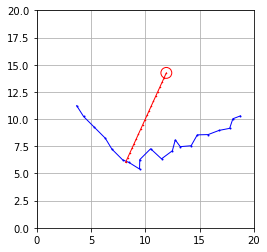

DEBUG:root:
DEBUG:root:reset
DEBUG:root:out of bounds
DEBUG:root:x: [19.358747, 20.022121]
DEBUG:root:y: [7.81572, 8.81572]
DEBUG:root:goal: [ 8.952226 15.699769]


done
info {'distance_to_goal': 13.0558, 'steps_taken': 1, 'previous_state': array([20.022121,  8.81572 ,  8.952226, 15.699769,  8.866132, 16.168112],
      dtype=float32), 'new_state': array([20.022121,  8.81572 ,  8.952226, 15.699769,  8.866132, 16.168112],
      dtype=float32)}


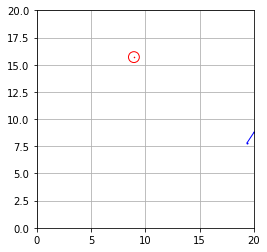

DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 0.9048886299133301
DEBUG:root:movement: 0.0783991813659668
DEBUG:root:vector 1: [ 1. -1.]
DEBUG:root:vector 2: [ 1. -1.]
DEBUG:root:angle: 0.0003452669847162036
DEBUG:root:movement: 0.07167696952819824
DEBUG:root:vector 1: [ 1. -1.]
DEBUG:root:vector 2: [1.         0.06468916]
DEBUG:root:angle: 0.8499973655879425
DEBUG:root:movement: 0.5669331550598145
DEBUG:root:vector 1: [1.         0.06468916]
DEBUG:root:vector 2: [0.31643295 0.9862342 ]
DEBUG:root:angle: 1.1957236756455685
DEBUG:root:movement: -0.9685444831848145
DEBUG:root:vector 1: [0.31643295 0.9862342 ]
DEBUG:root:vector 2: [ 0.88900375 -0.35693884]
DEBUG:root:angle: 1.642125295153338
DEBUG:root:movement: -0.8160974979400635
DEBUG:root:vector 1: [ 0.88900375 -0.35693884]
DEBUG:root:vector 2: [1.         0.08756638]
DEBUG:root:angle: 0.46914614930146215
DEBUG:root:movement: -0.9623851776123047
DEBUG:root:vector 1: [1.         0.08756638]
DEBUG:root:vector 2: [1.         0.0911645

done
info {'distance_to_goal': 11.39203, 'steps_taken': 20, 'previous_state': array([18.857769, 11.584451,  8.421914, 16.545715,  8.53352 , 16.082788],
      dtype=float32), 'new_state': array([18.857769, 11.584451,  8.421914, 16.545715,  8.53352 , 16.082788],
      dtype=float32)}


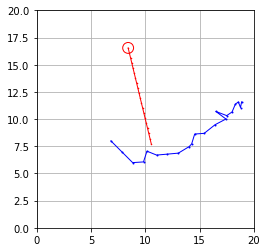

In [5]:

# test prediction
logger.setLevel(logging.DEBUG)

episodes = 10
for episode in range(episodes):
    env.reset()

    while True:
        action, _states = model.predict(env.state)
        obs, rewards, done, info = env.step(action)
        if done:
            print('done')
            print("info", info)
            break
    env.render()

In [6]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=10, render=False)

# TODO render doesn't work

/home/luttkule/anaconda3/envs/rl-test/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
DEBUG:root:
DEBUG:root:reset
DEBUG:root:movement: 0.41894054412841797
DEBUG:root:movement: 0.8637495040893555
DEBUG:root:vector 1: [0.10240555 1.        ]
DEBUG:root:vector 2: [0.06613541 1.        ]
DEBUG:root:angle: 0.036009170189937274
DEBUG:root:movement: 0.8042383193969727
DEBUG:root:vector 1: [0.06613541 1.        ]
DEBUG:root:vector 2: [0.01268578 0.84527636]
DEBUG:root:angle: 0.05103151188651816
DEBUG:root:movement: 0.7267055511474609
DEBUG:root:vector 1: [0.01268578 0.84527636]
DEBUG:root:vector 2: [-0.0196991  0.6419401]
DEBUG:root:angle: 0.045683720776072585
DEBUG:root:movement: 0.6486272811889648
DEBUG:ro

(-2601.915193939209, 709.2898749823586)